# Data Preprocessing

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
#importing the dataset
data = pd.read_csv('C:\\Users\\GAUTHAM\\Desktop\\H2HBABBA3158.csv',nrows=50000)

In [3]:
#displaying the dataset
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,14-01-19 0:00,2019,1928547333,02-01-19,20190101,20190102,20190117,USD,RV,1,NaN,716.26,20190102,NAH4,1.928547e+09,0
1,CA02,140104409,LOB co,20-12-19 0:00,2019,2960598474,09-12-19,20191209,20191209,20191220,CAD,RV,1,NaN,123877.32,20191210,CA10,2.960598e+09,0
2,U001,200700919,US,28-08-19 0:00,2019,1929738027,12-08-19,20190812,20190812,20190827,USD,RV,1,NaN,33247.32,20190812,NAA8,1.929738e+09,0
3,U001,200793568,SUPE associates,NaN,2020,1930829140,27-04-20,20200427,20200427,20200512,USD,RV,1,NaN,89985.91,20200427,NAA8,1.930829e+09,1
4,U001,200782669,SYGMA in,12-02-20 0:00,2020,1930439884,27-01-20,20200124,20200127,20200211,USD,RV,1,NaN,967.14,20200127,NAA8,1.930440e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200353024,DECA us,16-05-19 0:00,2019,1929277870,08-05-19,20190508,20190508,20190524,USD,RV,1,NaN,5373.36,20190501,NAM4,1.929278e+09,0
49996,U001,200353024,DECA systems,28-01-19 0:00,2019,1928646130,18-01-19,20190118,20190118,20190123,USD,RV,1,NaN,8215.79,20190116,NAM1,1.928646e+09,0
49997,U001,200726979,BJ'S us,24-10-19 0:00,2019,1929988233,09-10-19,20191008,20191009,20191024,USD,RV,1,NaN,671.17,20191009,NAA8,1.929988e+09,0
49998,U001,200769623,WAL-MAR foundation,NaN,2020,1930629846,10-03-20,20200310,20200310,20200325,USD,RV,1,NaN,45477.62,20200310,NAH4,1.930630e+09,1


In [4]:
#displaying the rows and columns of the dataset
data.shape

(50000, 19)

In [5]:
#displaying the number of elements in the dataset
data.size

950000

In [6]:
#diplaying the summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

## Datetime conversion 

In [7]:
#datetime conversion of clear_date column
data['clear_date'] = pd.to_datetime(data['clear_date'], format = "%d-%m-%y", infer_datetime_format = True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,2019-01-14,2019,1928547333,02-01-19,20190101,20190102,20190117,USD,RV,1,NaN,716.26,20190102,NAH4,1.928547e+09,0
1,CA02,140104409,LOB co,2019-12-20,2019,2960598474,09-12-19,20191209,20191209,20191220,CAD,RV,1,NaN,123877.32,20191210,CA10,2.960598e+09,0
2,U001,200700919,US,2019-08-28,2019,1929738027,12-08-19,20190812,20190812,20190827,USD,RV,1,NaN,33247.32,20190812,NAA8,1.929738e+09,0
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,20200427,20200427,20200512,USD,RV,1,NaN,89985.91,20200427,NAA8,1.930829e+09,1
4,U001,200782669,SYGMA in,2020-12-02,2020,1930439884,27-01-20,20200124,20200127,20200211,USD,RV,1,NaN,967.14,20200127,NAA8,1.930440e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200353024,DECA us,2019-05-16,2019,1929277870,08-05-19,20190508,20190508,20190524,USD,RV,1,NaN,5373.36,20190501,NAM4,1.929278e+09,0
49996,U001,200353024,DECA systems,2019-01-28,2019,1928646130,18-01-19,20190118,20190118,20190123,USD,RV,1,NaN,8215.79,20190116,NAM1,1.928646e+09,0
49997,U001,200726979,BJ'S us,2019-10-24,2019,1929988233,09-10-19,20191008,20191009,20191024,USD,RV,1,NaN,671.17,20191009,NAA8,1.929988e+09,0
49998,U001,200769623,WAL-MAR foundation,NaT,2020,1930629846,10-03-20,20200310,20200310,20200325,USD,RV,1,NaN,45477.62,20200310,NAH4,1.930630e+09,1


In [8]:
#datetime conversion of due_in_date column
data['due_in_date'] = data['due_in_date'].astype(int)
data['due_in_date'] = data['due_in_date'].astype(str)
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format = "%d-%m-%Y", infer_datetime_format = True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,2019-01-14,2019,1928547333,02-01-19,20190101,20190102,2019-01-17,USD,RV,1,NaN,716.26,20190102,NAH4,1.928547e+09,0
1,CA02,140104409,LOB co,2019-12-20,2019,2960598474,09-12-19,20191209,20191209,2019-12-20,CAD,RV,1,NaN,123877.32,20191210,CA10,2.960598e+09,0
2,U001,200700919,US,2019-08-28,2019,1929738027,12-08-19,20190812,20190812,2019-08-27,USD,RV,1,NaN,33247.32,20190812,NAA8,1.929738e+09,0
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,20200427,20200427,2020-05-12,USD,RV,1,NaN,89985.91,20200427,NAA8,1.930829e+09,1
4,U001,200782669,SYGMA in,2020-12-02,2020,1930439884,27-01-20,20200124,20200127,2020-02-11,USD,RV,1,NaN,967.14,20200127,NAA8,1.930440e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200353024,DECA us,2019-05-16,2019,1929277870,08-05-19,20190508,20190508,2019-05-24,USD,RV,1,NaN,5373.36,20190501,NAM4,1.929278e+09,0
49996,U001,200353024,DECA systems,2019-01-28,2019,1928646130,18-01-19,20190118,20190118,2019-01-23,USD,RV,1,NaN,8215.79,20190116,NAM1,1.928646e+09,0
49997,U001,200726979,BJ'S us,2019-10-24,2019,1929988233,09-10-19,20191008,20191009,2019-10-24,USD,RV,1,NaN,671.17,20191009,NAA8,1.929988e+09,0
49998,U001,200769623,WAL-MAR foundation,NaT,2020,1930629846,10-03-20,20200310,20200310,2020-03-25,USD,RV,1,NaN,45477.62,20200310,NAH4,1.930630e+09,1


In [9]:
#datetime conversion of document_create_date column
data['document_create_date'] = data['document_create_date'].astype(int)
data['document_create_date'] = data['document_create_date'].astype(str)
data['document_create_date'] = pd.to_datetime(data['document_create_date'], format = "%d-%m-%y", infer_datetime_format = True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,2019-01-14,2019,1928547333,02-01-19,2019-01-01,20190102,2019-01-17,USD,RV,1,NaN,716.26,20190102,NAH4,1.928547e+09,0
1,CA02,140104409,LOB co,2019-12-20,2019,2960598474,09-12-19,2019-12-09,20191209,2019-12-20,CAD,RV,1,NaN,123877.32,20191210,CA10,2.960598e+09,0
2,U001,200700919,US,2019-08-28,2019,1929738027,12-08-19,2019-08-12,20190812,2019-08-27,USD,RV,1,NaN,33247.32,20190812,NAA8,1.929738e+09,0
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,20200427,2020-05-12,USD,RV,1,NaN,89985.91,20200427,NAA8,1.930829e+09,1
4,U001,200782669,SYGMA in,2020-12-02,2020,1930439884,27-01-20,2020-01-24,20200127,2020-02-11,USD,RV,1,NaN,967.14,20200127,NAA8,1.930440e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200353024,DECA us,2019-05-16,2019,1929277870,08-05-19,2019-05-08,20190508,2019-05-24,USD,RV,1,NaN,5373.36,20190501,NAM4,1.929278e+09,0
49996,U001,200353024,DECA systems,2019-01-28,2019,1928646130,18-01-19,2019-01-18,20190118,2019-01-23,USD,RV,1,NaN,8215.79,20190116,NAM1,1.928646e+09,0
49997,U001,200726979,BJ'S us,2019-10-24,2019,1929988233,09-10-19,2019-10-08,20191009,2019-10-24,USD,RV,1,NaN,671.17,20191009,NAA8,1.929988e+09,0
49998,U001,200769623,WAL-MAR foundation,NaT,2020,1930629846,10-03-20,2020-03-10,20200310,2020-03-25,USD,RV,1,NaN,45477.62,20200310,NAH4,1.930630e+09,1


In [10]:
#datetime conversion for document_create_date.1 column
data['document_create_date.1'] = data['document_create_date.1'].astype(int)
data['document_create_date.1'] = data['document_create_date.1'].astype(str)
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format = "%d-%m-%y", infer_datetime_format = True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,2019-01-14,2019,1928547333,02-01-19,2019-01-01,2019-01-02,2019-01-17,USD,RV,1,NaN,716.26,20190102,NAH4,1.928547e+09,0
1,CA02,140104409,LOB co,2019-12-20,2019,2960598474,09-12-19,2019-12-09,2019-12-09,2019-12-20,CAD,RV,1,NaN,123877.32,20191210,CA10,2.960598e+09,0
2,U001,200700919,US,2019-08-28,2019,1929738027,12-08-19,2019-08-12,2019-08-12,2019-08-27,USD,RV,1,NaN,33247.32,20190812,NAA8,1.929738e+09,0
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,NaN,89985.91,20200427,NAA8,1.930829e+09,1
4,U001,200782669,SYGMA in,2020-12-02,2020,1930439884,27-01-20,2020-01-24,2020-01-27,2020-02-11,USD,RV,1,NaN,967.14,20200127,NAA8,1.930440e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200353024,DECA us,2019-05-16,2019,1929277870,08-05-19,2019-05-08,2019-05-08,2019-05-24,USD,RV,1,NaN,5373.36,20190501,NAM4,1.929278e+09,0
49996,U001,200353024,DECA systems,2019-01-28,2019,1928646130,18-01-19,2019-01-18,2019-01-18,2019-01-23,USD,RV,1,NaN,8215.79,20190116,NAM1,1.928646e+09,0
49997,U001,200726979,BJ'S us,2019-10-24,2019,1929988233,09-10-19,2019-10-08,2019-10-09,2019-10-24,USD,RV,1,NaN,671.17,20191009,NAA8,1.929988e+09,0
49998,U001,200769623,WAL-MAR foundation,NaT,2020,1930629846,10-03-20,2020-03-10,2020-03-10,2020-03-25,USD,RV,1,NaN,45477.62,20200310,NAH4,1.930630e+09,1


In [11]:
#datetime conversion for baseline_create_date column
data['baseline_create_date'] = data['baseline_create_date'].astype(int)
data['baseline_create_date'] = data['baseline_create_date'].astype(str)
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format = "%d-%m-%y", infer_datetime_format = True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,2019-01-14,2019,1928547333,02-01-19,2019-01-01,2019-01-02,2019-01-17,USD,RV,1,NaN,716.26,2019-01-02,NAH4,1.928547e+09,0
1,CA02,140104409,LOB co,2019-12-20,2019,2960598474,09-12-19,2019-12-09,2019-12-09,2019-12-20,CAD,RV,1,NaN,123877.32,2019-12-10,CA10,2.960598e+09,0
2,U001,200700919,US,2019-08-28,2019,1929738027,12-08-19,2019-08-12,2019-08-12,2019-08-27,USD,RV,1,NaN,33247.32,2019-08-12,NAA8,1.929738e+09,0
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,NaN,89985.91,2020-04-27,NAA8,1.930829e+09,1
4,U001,200782669,SYGMA in,2020-12-02,2020,1930439884,27-01-20,2020-01-24,2020-01-27,2020-02-11,USD,RV,1,NaN,967.14,2020-01-27,NAA8,1.930440e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200353024,DECA us,2019-05-16,2019,1929277870,08-05-19,2019-05-08,2019-05-08,2019-05-24,USD,RV,1,NaN,5373.36,2019-05-01,NAM4,1.929278e+09,0
49996,U001,200353024,DECA systems,2019-01-28,2019,1928646130,18-01-19,2019-01-18,2019-01-18,2019-01-23,USD,RV,1,NaN,8215.79,2019-01-16,NAM1,1.928646e+09,0
49997,U001,200726979,BJ'S us,2019-10-24,2019,1929988233,09-10-19,2019-10-08,2019-10-09,2019-10-24,USD,RV,1,NaN,671.17,2019-10-09,NAA8,1.929988e+09,0
49998,U001,200769623,WAL-MAR foundation,NaT,2020,1930629846,10-03-20,2020-03-10,2020-03-10,2020-03-25,USD,RV,1,NaN,45477.62,2020-03-10,NAH4,1.930630e+09,1


## Target Column Creation

In [12]:
#we are creating a target column named "delay" that is found out by subtracting the clear_date and due_in_date
data['delay'] = data['clear_date'].sub(data['due_in_date'], axis = 0)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,200769623,WAL-MAR systems,2019-01-14,2019,1928547333,02-01-19,2019-01-01,2019-01-02,2019-01-17,USD,RV,1,NaN,716.26,2019-01-02,NAH4,1.928547e+09,0,-3 days
1,CA02,140104409,LOB co,2019-12-20,2019,2960598474,09-12-19,2019-12-09,2019-12-09,2019-12-20,CAD,RV,1,NaN,123877.32,2019-12-10,CA10,2.960598e+09,0,0 days
2,U001,200700919,US,2019-08-28,2019,1929738027,12-08-19,2019-08-12,2019-08-12,2019-08-27,USD,RV,1,NaN,33247.32,2019-08-12,NAA8,1.929738e+09,0,1 days
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,NaN,89985.91,2020-04-27,NAA8,1.930829e+09,1,NaT
4,U001,200782669,SYGMA in,2020-12-02,2020,1930439884,27-01-20,2020-01-24,2020-01-27,2020-02-11,USD,RV,1,NaN,967.14,2020-01-27,NAA8,1.930440e+09,0,295 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200353024,DECA us,2019-05-16,2019,1929277870,08-05-19,2019-05-08,2019-05-08,2019-05-24,USD,RV,1,NaN,5373.36,2019-05-01,NAM4,1.929278e+09,0,-8 days
49996,U001,200353024,DECA systems,2019-01-28,2019,1928646130,18-01-19,2019-01-18,2019-01-18,2019-01-23,USD,RV,1,NaN,8215.79,2019-01-16,NAM1,1.928646e+09,0,5 days
49997,U001,200726979,BJ'S us,2019-10-24,2019,1929988233,09-10-19,2019-10-08,2019-10-09,2019-10-24,USD,RV,1,NaN,671.17,2019-10-09,NAA8,1.929988e+09,0,0 days
49998,U001,200769623,WAL-MAR foundation,NaT,2020,1930629846,10-03-20,2020-03-10,2020-03-10,2020-03-25,USD,RV,1,NaN,45477.62,2020-03-10,NAH4,1.930630e+09,1,NaT


In [13]:
#we get the dataset containing all the not null values of clear_date and store it in 'train'
train = data[data['clear_date'].notnull()]

In [14]:
#we get the dataset containing all the null values of clear_date and store it in 'test'
test = data[data['clear_date'].isnull()]

## Null Imputation

In [15]:
#displaying sum of missing values in the 'train' dataset
train.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
delay                         0
dtype: int64

In [16]:
#dropping the invoice id as it is not needed for prediction
train.drop(['invoice_id'], axis = 1, inplace = True)

In [17]:
#displaying the summary of the 'train' dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   business_code           40000 non-null  object         
 1   cust_number             40000 non-null  object         
 2   name_customer           40000 non-null  object         
 3   clear_date              40000 non-null  datetime64[ns] 
 4   buisness_year           40000 non-null  int64          
 5   doc_id                  40000 non-null  int64          
 6   posting_date            40000 non-null  object         
 7   document_create_date    40000 non-null  datetime64[ns] 
 8   document_create_date.1  40000 non-null  datetime64[ns] 
 9   due_in_date             40000 non-null  datetime64[ns] 
 10  invoice_currency        40000 non-null  object         
 11  document type           40000 non-null  object         
 12  posting_id              40000 no

## Constant and Duplicate Removal

In [18]:
#displaying the pairwise covariance of columns in 'train' dataset
train.cov()

,buisness_year,doc_id,posting_id,area_business,total_open_amount,isOpen
buisness_year,1.147628e-01,-1.990937e+06,0.0,NaN,-1.143512e+01,0.0
doc_id,-1.990937e+06,8.609063e+16,0.0,NaN,1.883999e+12,0.0
posting_id,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00,0.0
area_business,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-1.143512e+01,1.883999e+12,0.0,NaN,1.555411e+09,0.0
isOpen,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00,0.0


In [19]:
#displaying unique values in columns of 'train' dataset
train.nunique()

business_code                 6
cust_number                1033
name_customer              3855
clear_date                  390
buisness_year                 2
doc_id                    39117
posting_date                422
document_create_date        424
document_create_date.1      424
due_in_date                 494
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         35589
baseline_create_date        434
cust_payment_terms           64
isOpen                        1
delay                       591
dtype: int64

In [20]:
#we take the unique value as 64 and display the count of values using value_counts()
for colmn in train.columns:
    if train[colmn].nunique() <= 64:
        print(colmn)
        print(train[colmn].value_counts())
        print('\n')

business_code
U001    36246
CA02     3124
U013      484
U002      127
U005       17
U007        2
Name: business_code, dtype: int64


buisness_year
2019    34710
2020     5290
Name: buisness_year, dtype: int64


invoice_currency
USD    36876
CAD     3124
Name: invoice_currency, dtype: int64


document type
RV    39993
X2        7
Name: document type, dtype: int64


posting_id
1    40000
Name: posting_id, dtype: int64


area_business
Series([], Name: area_business, dtype: int64)


cust_payment_terms
NAA8    16166
NAH4    10614
CA10     3039
NAC6     1330
NAM4     1090
        ...  
NAUY        1
NATY        1
NAWM        1
C129        1
NA31        1
Name: cust_payment_terms, Length: 64, dtype: int64


isOpen
0    40000
Name: isOpen, dtype: int64




In [21]:
#we find the low occurence business codes and group it together into 'Business Codes' in 'train' dataset
train['business_code'] = np.where(train['business_code'].isin(["U007, U005, U002"]),"Business Codes", train['business_code'])

In [22]:
#we sort the 'train' dataset using posting_date
train.sort_values(by = ['posting_date'], ascending = True, inplace = True)
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
31200,U001,200769623,WAL-MAR systems,2019-01-14,2019,1928545221,01-01-19,2018-12-31,2019-01-01,2019-01-16,USD,RV,1,NaN,7265.16,2019-01-01,NAH4,0,-2 days
3583,U001,200759878,SA corp,2019-01-17,2019,1928545089,01-01-19,2018-12-31,2019-01-01,2019-01-16,USD,RV,1,NaN,51658.44,2019-01-01,NAH4,0,1 days
38054,U001,200782669,SYGMA in,2019-01-18,2019,1928545988,01-01-19,2018-12-31,2019-01-01,2019-01-16,USD,RV,1,NaN,26752.38,2019-01-01,NAA8,0,2 days
42303,U001,200759878,SA llc,2019-01-17,2019,1928545737,01-01-19,2018-12-31,2019-01-01,2019-01-16,USD,RV,1,NaN,40686.00,2019-01-01,NAH4,0,1 days
30116,U001,200793513,KROGER corp,2019-01-16,2019,1928550600,01-01-19,2019-01-02,2019-01-01,2019-01-16,USD,RV,1,NaN,45498.69,2019-01-01,NAA8,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,U001,200782001,GORDO foundation,2020-04-02,2020,1930335125,31-12-19,2019-12-30,2019-12-31,2020-02-01,USD,RV,1,NaN,21644.32,2019-12-31,NA32,0,61 days
8988,U001,200769623,WAL-MAR co,2020-10-01,2020,1930332705,31-12-19,2019-12-29,2019-12-31,2020-01-15,USD,RV,1,NaN,15354.52,2019-12-31,NAH4,0,260 days
34079,U001,200770567,LABAT co,2020-01-17,2020,1930326477,31-12-19,2019-12-28,2019-12-31,2020-01-15,USD,RV,1,NaN,454.40,2019-12-31,NAA8,0,2 days
14715,CA02,140104240,FEDER in,2020-01-14,2020,2960604087,31-12-19,2019-12-31,2019-12-31,2020-01-19,CAD,RV,1,NaN,6706.35,2020-01-09,CA10,0,-5 days


## Train, Test and Validation Split

In [23]:
#we split 'train' dataset as X and y where X is 'train' dataset without 'delay' column and y is a series with 'delay'
X = train.drop(['delay'], axis = 1)
y = train['delay']

In [24]:
#We split the 'train' dataset into 'train' and 'test_vald' of 70% 'train' and 30% 'test_vald'
X_train, X_test_vald, y_train, y_test_vald = train_test_split(X, y, test_size = 0.30, random_state =0)
X_train.shape, X_test_vald.shape

((28000, 18), (12000, 18))

In [25]:
#Further, we split the 30% 'test_vald' into 15% 'test' and 15% 'vald'
X_test, X_vald, y_test, y_vald = train_test_split(X_test_vald, y_test_vald, test_size = 0.50, random_state = 0)
X_test.shape, X_vald.shape

((6000, 18), (6000, 18))

# Exploratory Data Analysis (EDA)

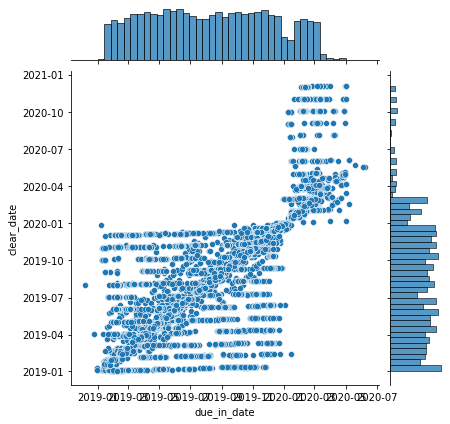

In [26]:
#a seaborn scatter plot describing the variation between due_date and clear_date
sns.jointplot(x = X_train['due_in_date'], y = X_train['clear_date'], kind = 'scatter')
plt.show()

### INFERENCE FROM THE SCATTER PLOT:

-> The plot is between the columns clear date and due_date. As we can see from the plot, the dates are scattered between 2019-04 to 2020-04.

In [27]:
xymerge_train = X_train.merge(y_train, on = X_train.index)

In [28]:
xymerge_train.nunique()

key_0                     28000
business_code                 6
cust_number                 932
name_customer              3257
clear_date                  378
buisness_year                 2
doc_id                    27545
posting_date                422
document_create_date        424
document_create_date.1      424
due_in_date                 486
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         25437
baseline_create_date        433
cust_payment_terms           61
isOpen                        1
delay                       574
dtype: int64

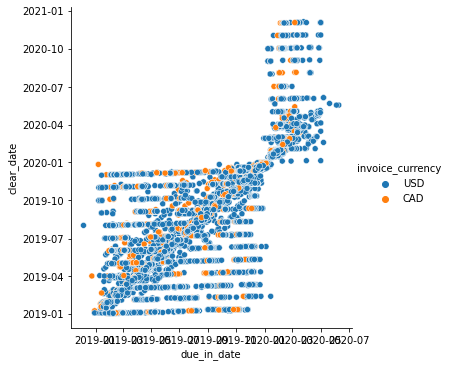

In [29]:
#relationship plot between 'clear_date' and 'due_in_date' with respect to currency
sns.relplot(x = 'due_in_date', y = 'clear_date', hue = 'invoice_currency', data = xymerge_train)

### INFERENCE FROM THE RELATION PLOT :

->From the relationship plot plotted above between clear date and due date with respect to invoice currency, we find that the concentration of 'USD' used is more as compared to the 'CAD'.

<AxesSubplot:xlabel='clear_date', ylabel='Count'>

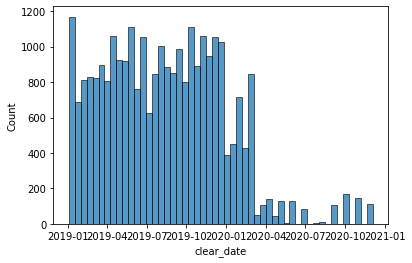

In [30]:
#a histogram that displays the count of the clear_date
sns.histplot(xymerge_train['clear_date'])

### INFERENCE FROM HISTOGRAM PLOT :

-> From the histogram plot above plotted for the count of clear date, we find that the maximum clear date used is 2019-01 which is approximately 1200 and the minimum clear date used is 2021-01 which is 0.

<AxesSubplot:xlabel='due_in_date', ylabel='Count'>

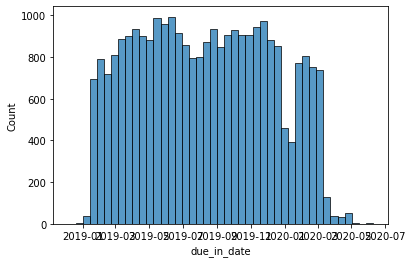

In [31]:
#a histogram that displays the count of the clear_date
sns.histplot(xymerge_train['due_in_date'])

### INFERENCE FROM HISTOGRAM PLOT :

-> From the histogram plotted above for the count of due date, we find that the maximum due date used is 2019-07 which is almost 1000 and the minimum duedate used is 2020-07 which is 0. 

# Feature Engineering

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 47218 to 26109
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           28000 non-null  object        
 1   cust_number             28000 non-null  object        
 2   name_customer           28000 non-null  object        
 3   clear_date              28000 non-null  datetime64[ns]
 4   buisness_year           28000 non-null  int64         
 5   doc_id                  28000 non-null  int64         
 6   posting_date            28000 non-null  object        
 7   document_create_date    28000 non-null  datetime64[ns]
 8   document_create_date.1  28000 non-null  datetime64[ns]
 9   due_in_date             28000 non-null  datetime64[ns]
 10  invoice_currency        28000 non-null  object        
 11  document type           28000 non-null  object        
 12  posting_id              28000 non-null  in

In [33]:
#Converting total_open_amount from float64 to int using astype()
X_train['total_open_amount'] = X_train['total_open_amount'].astype(int)
X_vald['total_open_amount'] = X_vald['total_open_amount'].astype(int)
X_test['total_open_amount'] = X_test['total_open_amount'].astype(int)

In [34]:
#Label encoding 'business_code'
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['bscode_enc'] = business_code_encoder.transform(X_train['business_code'])

business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_vald['business_code'])
X_vald['bscode_enc'] = business_code_encoder.transform(X_vald['business_code'])

business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_test['business_code'])
X_test['bscode_enc'] = business_code_encoder.transform(X_test['business_code'])

In [35]:
X_train[['business_code', 'bscode_enc']]

,business_code,bscode_enc
47218,U001,1
35738,U001,1
46139,CA02,0
1040,U001,1
20294,U001,1
...,...,...
15920,CA02,0
41965,U001,1
48283,U001,1
8322,U001,1


In [36]:
#dropping business_code as it is not required for delay prediction
X_train.drop(['business_code'], axis = 1, inplace = True)
X_vald.drop(['business_code'], axis = 1, inplace = True)
X_test.drop(['business_code'], axis = 1, inplace = True)

In [37]:
#dropping cust_number as it is not required for delay prediction
X_train.drop(['cust_number'], axis = 1, inplace = True)
X_vald.drop(['cust_number'], axis = 1, inplace = True)
X_test.drop(['cust_number'], axis = 1, inplace = True)

In [38]:
#dropping name_customer as it is not required for delay prediction
X_train.drop(['name_customer'], axis = 1, inplace = True)
X_vald.drop(['name_customer'], axis = 1, inplace = True)
X_test.drop(['name_customer'], axis = 1, inplace = True)

In [39]:
#dropping posting_date as it is not required for delay prediction
X_train.drop(['posting_date'], axis = 1, inplace = True)
X_vald.drop(['posting_date'], axis = 1, inplace = True)
X_test.drop(['posting_date'], axis = 1, inplace = True)

In [40]:
#Label encoding 'document type'
document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_train['document type'])
X_train['doctype_enc'] = document_type_encoder.transform(X_train['document type'])

document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_vald['document type'])
X_vald['doctype_enc'] =document_type_encoder.transform(X_vald['document type'])

document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_test['document type'])
X_test['doctype_enc'] = document_type_encoder.transform(X_test['document type'])

In [41]:
X_train.drop(['document type'], axis = 1, inplace = True)
X_vald.drop(['document type'], axis = 1, inplace = True)
X_test.drop(['document type'], axis = 1, inplace = True)

In [42]:
#Label encoding 'cust_payment_terms'
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cpmterms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_vald['cust_payment_terms'])
X_vald['cpmterms_enc'] = cust_payment_terms_encoder.transform(X_vald['cust_payment_terms'])

cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_test['cust_payment_terms'])
X_test['cpmterms_enc'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [43]:
X_train.drop(['cust_payment_terms'], axis = 1, inplace = True)
X_vald.drop(['cust_payment_terms'], axis = 1, inplace = True)
X_test.drop(['cust_payment_terms'], axis = 1, inplace = True)

In [44]:
#dropping document_create_date.1 as it is not required for delay prediction
X_train.drop(['document_create_date.1'], axis = 1, inplace = True)
X_vald.drop(['document_create_date.1'], axis = 1, inplace = True)
X_test.drop(['document_create_date.1'], axis = 1, inplace = True)

In [45]:
#encoding the 'baseline_create_date'
X_train['baseline_date_day'] = X_train['baseline_create_date'].dt.day
X_vald['baseline_date_day'] = X_vald['baseline_create_date'].dt.day
X_test['baseline_date_day'] = X_test['baseline_create_date'].dt.day

X_train['baseline_date_month'] = X_train['baseline_create_date'].dt.month
X_vald['baseline_date_month'] = X_vald['baseline_create_date'].dt.month
X_test['baseline_date_month'] = X_test['baseline_create_date'].dt.month

In [46]:
#dropping baseline_create_date as it is not required for delay prediction
X_train.drop(['baseline_create_date'], axis = 1, inplace = True)
X_vald.drop(['baseline_create_date'], axis = 1, inplace = True)
X_test.drop(['baseline_create_date'], axis = 1, inplace = True)

In [47]:
#dropping clear_date as we will have data leakage
X_train.drop(['clear_date'], axis = 1, inplace = True)
X_vald.drop(['clear_date'], axis = 1, inplace = True)
X_test.drop(['clear_date'], axis = 1, inplace = True)

In [48]:
#encoding the 'due_in_date'
X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_vald['due_in_date_day'] = X_vald['due_in_date'].dt.day
X_test['due_in_date_day'] = X_test['due_in_date'].dt.day

X_train['due_in_date_month'] = X_train['due_in_date'].dt.month
X_vald['due_in_date_month'] = X_vald['due_in_date'].dt.month
X_test['due_in_date_month'] = X_test['due_in_date'].dt.month

In [49]:
#dropping due_in_date as we will have data leakage 
X_train.drop(['due_in_date'], axis = 1, inplace = True)
X_vald.drop(['due_in_date'], axis = 1, inplace = True)
X_test.drop(['due_in_date'], axis = 1, inplace = True)

In [50]:
#dropping invoice_currency as it is not required for delay prediction
X_train.drop(['invoice_currency'], axis = 1, inplace = True)
X_vald.drop(['invoice_currency'], axis = 1, inplace = True)
X_test.drop(['invoice_currency'], axis = 1, inplace = True)

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 47218 to 26109
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buisness_year         28000 non-null  int64         
 1   doc_id                28000 non-null  int64         
 2   document_create_date  28000 non-null  datetime64[ns]
 3   posting_id            28000 non-null  int64         
 4   area_business         0 non-null      float64       
 5   total_open_amount     28000 non-null  int32         
 6   isOpen                28000 non-null  int64         
 7   bscode_enc            28000 non-null  int32         
 8   doctype_enc           28000 non-null  int32         
 9   cpmterms_enc          28000 non-null  int32         
 10  baseline_date_day     28000 non-null  int64         
 11  baseline_date_month   28000 non-null  int64         
 12  due_in_date_day       28000 non-null  int64         
 13  due_in_date_

In [52]:
#dropping business_year and document_create_date as we won't need them to predict delay
X_train.drop(['buisness_year'], axis = 1, inplace = True)
X_vald.drop(['buisness_year'], axis = 1, inplace = True)
X_test.drop(['buisness_year'], axis = 1, inplace = True)

X_train.drop(['document_create_date'], axis = 1, inplace = True)
X_vald.drop(['document_create_date'], axis = 1, inplace = True)
X_test.drop(['document_create_date'], axis = 1, inplace = True)

In [53]:
#converting the y_train, y_test and y_val into number of days
y_train = y_train.dt.days
y_vald = y_vald.dt.days
y_test = y_test.dt.days

# Feature Selection

In [54]:
Var_thr = VarianceThreshold()
Var_thr.fit(X_train)

VarianceThreshold()

In [55]:
#finding variances using VarianceThreshold()
Var_thr.variances_

array([7.57151706e+09, 0.00000000e+00,            nan, 8.16381000e+05,
       0.00000000e+00, 2.81478158e-01, 1.78539541e-04, 6.00000000e+01,
       3.00000000e+01, 1.10000000e+01, 3.00000000e+01, 1.10000000e+01])

<AxesSubplot:>

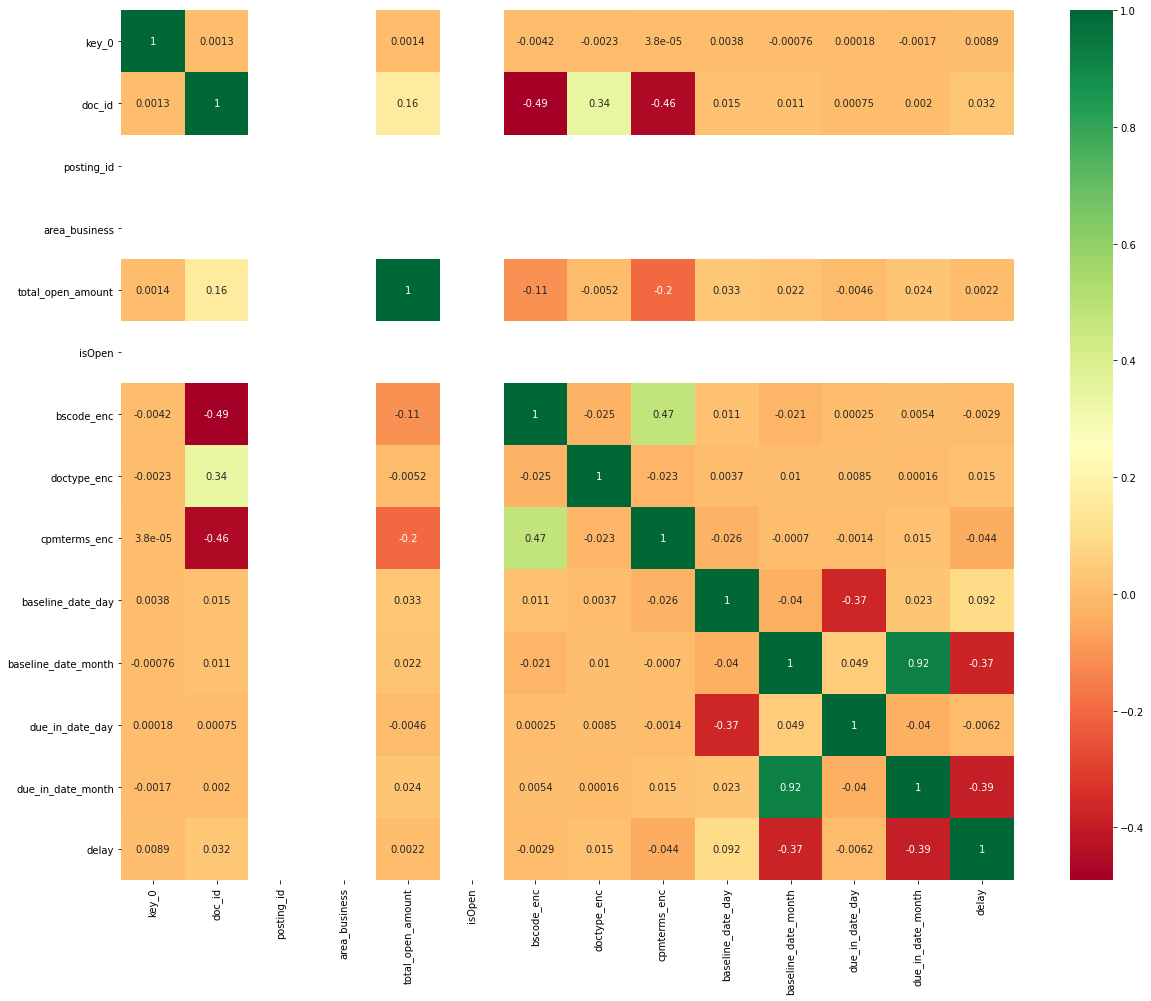

In [56]:
#plotting heatmap to check the correlation between columns
plt.figure(figsize = (20, 16))
sns.heatmap(X_train.merge(y_train, on = X_train.index).corr(), cmap = "RdYlGn", annot = True)

In [57]:
#dropping isOpen, posting_id and area_business as all these columns correlation values are empty in the heatmap
X_train.drop(['isOpen'], axis = 1, inplace = True)
X_vald.drop(['isOpen'], axis = 1, inplace = True)
X_test.drop(['isOpen'], axis = 1, inplace = True)

X_train.drop(['posting_id'], axis = 1, inplace = True)
X_vald.drop(['posting_id'], axis = 1, inplace = True)
X_test.drop(['posting_id'], axis = 1, inplace = True)

X_train.drop(['area_business'], axis = 1, inplace = True)
X_vald.drop(['area_business'], axis = 1, inplace = True)
X_test.drop(['area_business'], axis = 1, inplace = True)

In [58]:
#displaying the summary of X_train for reference
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 47218 to 26109
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doc_id               28000 non-null  int64
 1   total_open_amount    28000 non-null  int32
 2   bscode_enc           28000 non-null  int32
 3   doctype_enc          28000 non-null  int32
 4   cpmterms_enc         28000 non-null  int32
 5   baseline_date_day    28000 non-null  int64
 6   baseline_date_month  28000 non-null  int64
 7   due_in_date_day      28000 non-null  int64
 8   due_in_date_month    28000 non-null  int64
dtypes: int32(4), int64(5)
memory usage: 1.7 MB


In [59]:
#displaying the summary of X_vald for reference
X_vald.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 41525 to 44861
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doc_id               6000 non-null   int64
 1   total_open_amount    6000 non-null   int32
 2   bscode_enc           6000 non-null   int32
 3   doctype_enc          6000 non-null   int32
 4   cpmterms_enc         6000 non-null   int32
 5   baseline_date_day    6000 non-null   int64
 6   baseline_date_month  6000 non-null   int64
 7   due_in_date_day      6000 non-null   int64
 8   due_in_date_month    6000 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 375.0 KB


In [60]:
#displaying the summary of X_test for reference
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 10274 to 11944
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doc_id               6000 non-null   int64
 1   total_open_amount    6000 non-null   int32
 2   bscode_enc           6000 non-null   int32
 3   doctype_enc          6000 non-null   int32
 4   cpmterms_enc         6000 non-null   int32
 5   baseline_date_day    6000 non-null   int64
 6   baseline_date_month  6000 non-null   int64
 7   due_in_date_day      6000 non-null   int64
 8   due_in_date_month    6000 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 375.0 KB


In [61]:
#dropping doc_id because we won't be needing it for prediction of delay
X_train.drop(['doc_id'], axis = 1, inplace = True)
X_vald.drop(['doc_id'], axis = 1, inplace = True)
X_test.drop(['doc_id'], axis = 1, inplace = True)

# ML Modelling

## Creating a base model (LinearRegression)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 47218 to 26109
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   total_open_amount    28000 non-null  int32
 1   bscode_enc           28000 non-null  int32
 2   doctype_enc          28000 non-null  int32
 3   cpmterms_enc         28000 non-null  int32
 4   baseline_date_day    28000 non-null  int64
 5   baseline_date_month  28000 non-null  int64
 6   due_in_date_day      28000 non-null  int64
 7   due_in_date_month    28000 non-null  int64
dtypes: int32(4), int64(4)
memory usage: 1.5 MB


In [63]:
#Using LinearRegression() for base model
base = LinearRegression()
base.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = base.predict(X_vald)

In [65]:
#displaying the value of MSE for base model using y_vald and y_pred
mean_squared_error(y_vald, y_pred, squared = False)

84.27169519191179

## Creating a Tree based Model (DecisionTree Regressor)

In [66]:
#Using DecisionTree Regressor for Tree based model
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 6)

In [67]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [68]:
y_pred2 = regressor.predict(X_vald)

In [69]:
#displaying the value of MSE for tree based model using y_vald and y_pred2
mean_squared_error(y_vald, y_pred2, squared = False)

68.31346991405997

In [70]:
#Finding the r2 score (r2 score should be between 0.3 and 0.8 for model to show good performance)
r2_score(y_vald, y_pred2)

0.4573921038042942

### Predicting in X_test

In [71]:
y_test_pred = regressor.predict(X_test)

In [72]:
#displaying the value of MSE for tree based model using y_test and y_test_pred
mean_squared_error(y_test, y_test_pred, squared = False)

68.8084620351764

# Data Preprocessing in 'test' dataset (dataset with clear date null)

In [73]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,NaN,89985.91,2020-04-27,NAA8,1.930829e+09,1,NaT
14,U001,200705372,FR in,NaT,2020,1930660630,18-03-20,2020-03-17,2020-03-18,2020-04-02,USD,RV,1,NaN,132089.80,2020-03-18,NAA8,1.930661e+09,1,NaT
17,U001,200726979,BJ'S corporation,NaT,2020,1930789436,16-04-20,2020-04-15,2020-04-16,2020-05-01,USD,RV,1,NaN,1900.01,2020-04-16,NAA8,1.930789e+09,1,NaT
18,U001,100036153,TENNES in,NaT,2020,1930632990,11-03-20,2020-03-10,2020-03-11,2020-03-26,USD,RV,1,NaN,48404.88,2020-03-11,NAA8,1.930633e+09,1,NaT
36,U001,200769623,WAL-MAR corporation,NaT,2020,1930737085,04-04-20,2020-04-03,2020-04-04,2020-04-19,USD,RV,1,NaN,3797.10,2020-04-04,NAH4,1.930737e+09,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,U001,100015557,BI foundation,NaT,2020,1930661358,17-03-20,2020-03-17,2020-03-17,2020-04-01,USD,RV,1,NaN,20440.90,2020-03-17,NAA8,1.930661e+09,1,NaT
49979,U001,200769623,WAL-MAR corp,NaT,2020,1930690766,24-03-20,2020-03-24,2020-03-24,2020-04-08,USD,RV,1,NaN,12410.98,2020-03-24,NAH4,1.930691e+09,1,NaT
49991,U001,200020431,DEC trust,NaT,2020,1930818200,23-04-20,2020-04-23,2020-04-23,2020-05-09,USD,RV,1,NaN,374.64,2020-04-16,NAM4,1.930818e+09,1,NaT
49993,U001,200769623,WAL-MAR corporation,NaT,2020,1930878045,09-05-20,2020-05-08,2020-05-09,2020-05-24,USD,RV,1,NaN,25360.58,2020-05-09,NAH4,1.930878e+09,1,NaT


In [74]:
#displaying the number of elements present in test dataset 
test.size

200000

In [75]:
#displaying rows and columns of test dataset
test.shape

(10000, 20)

In [76]:
#displaying summary of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   business_code           10000 non-null  object         
 1   cust_number             10000 non-null  object         
 2   name_customer           10000 non-null  object         
 3   clear_date              0 non-null      datetime64[ns] 
 4   buisness_year           10000 non-null  int64          
 5   doc_id                  10000 non-null  int64          
 6   posting_date            10000 non-null  object         
 7   document_create_date    10000 non-null  datetime64[ns] 
 8   document_create_date.1  10000 non-null  datetime64[ns] 
 9   due_in_date             10000 non-null  datetime64[ns] 
 10  invoice_currency        10000 non-null  object         
 11  document type           10000 non-null  object         
 12  posting_id              10000 no

In [77]:
#displaying sum of null values for columns in test dataset
test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
delay                     10000
dtype: int64

In [78]:
test_main = test.drop(['delay'], axis = 1)
test_main

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,NaN,89985.91,2020-04-27,NAA8,1.930829e+09,1
14,U001,200705372,FR in,NaT,2020,1930660630,18-03-20,2020-03-17,2020-03-18,2020-04-02,USD,RV,1,NaN,132089.80,2020-03-18,NAA8,1.930661e+09,1
17,U001,200726979,BJ'S corporation,NaT,2020,1930789436,16-04-20,2020-04-15,2020-04-16,2020-05-01,USD,RV,1,NaN,1900.01,2020-04-16,NAA8,1.930789e+09,1
18,U001,100036153,TENNES in,NaT,2020,1930632990,11-03-20,2020-03-10,2020-03-11,2020-03-26,USD,RV,1,NaN,48404.88,2020-03-11,NAA8,1.930633e+09,1
36,U001,200769623,WAL-MAR corporation,NaT,2020,1930737085,04-04-20,2020-04-03,2020-04-04,2020-04-19,USD,RV,1,NaN,3797.10,2020-04-04,NAH4,1.930737e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,U001,100015557,BI foundation,NaT,2020,1930661358,17-03-20,2020-03-17,2020-03-17,2020-04-01,USD,RV,1,NaN,20440.90,2020-03-17,NAA8,1.930661e+09,1
49979,U001,200769623,WAL-MAR corp,NaT,2020,1930690766,24-03-20,2020-03-24,2020-03-24,2020-04-08,USD,RV,1,NaN,12410.98,2020-03-24,NAH4,1.930691e+09,1
49991,U001,200020431,DEC trust,NaT,2020,1930818200,23-04-20,2020-04-23,2020-04-23,2020-05-09,USD,RV,1,NaN,374.64,2020-04-16,NAM4,1.930818e+09,1
49993,U001,200769623,WAL-MAR corporation,NaT,2020,1930878045,09-05-20,2020-05-08,2020-05-09,2020-05-24,USD,RV,1,NaN,25360.58,2020-05-09,NAH4,1.930878e+09,1


In [79]:
test.drop(['delay'], axis = 1, inplace = True)

In [80]:
test_main = test.drop(['area_business'], axis = 1)
test_main

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,89985.91,2020-04-27,NAA8,1.930829e+09,1
14,U001,200705372,FR in,NaT,2020,1930660630,18-03-20,2020-03-17,2020-03-18,2020-04-02,USD,RV,1,132089.80,2020-03-18,NAA8,1.930661e+09,1
17,U001,200726979,BJ'S corporation,NaT,2020,1930789436,16-04-20,2020-04-15,2020-04-16,2020-05-01,USD,RV,1,1900.01,2020-04-16,NAA8,1.930789e+09,1
18,U001,100036153,TENNES in,NaT,2020,1930632990,11-03-20,2020-03-10,2020-03-11,2020-03-26,USD,RV,1,48404.88,2020-03-11,NAA8,1.930633e+09,1
36,U001,200769623,WAL-MAR corporation,NaT,2020,1930737085,04-04-20,2020-04-03,2020-04-04,2020-04-19,USD,RV,1,3797.10,2020-04-04,NAH4,1.930737e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,U001,100015557,BI foundation,NaT,2020,1930661358,17-03-20,2020-03-17,2020-03-17,2020-04-01,USD,RV,1,20440.90,2020-03-17,NAA8,1.930661e+09,1
49979,U001,200769623,WAL-MAR corp,NaT,2020,1930690766,24-03-20,2020-03-24,2020-03-24,2020-04-08,USD,RV,1,12410.98,2020-03-24,NAH4,1.930691e+09,1
49991,U001,200020431,DEC trust,NaT,2020,1930818200,23-04-20,2020-04-23,2020-04-23,2020-05-09,USD,RV,1,374.64,2020-04-16,NAM4,1.930818e+09,1
49993,U001,200769623,WAL-MAR corporation,NaT,2020,1930878045,09-05-20,2020-05-08,2020-05-09,2020-05-24,USD,RV,1,25360.58,2020-05-09,NAH4,1.930878e+09,1


In [81]:
test.drop(['area_business'], axis = 1, inplace = True)

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  int64         
 5   doc_id                  10000 non-null  int64         
 6   posting_date            10000 non-null  object        
 7   document_create_date    10000 non-null  datetime64[ns]
 8   document_create_date.1  10000 non-null  datetime64[ns]
 9   due_in_date             10000 non-null  datetime64[ns]
 10  invoice_currency        10000 non-null  object        
 11  document type           10000 non-null  object        
 12  posting_id              10000 non-null  int64 

# Feature Engineering

### Label Encoding the columns

In [83]:
test_main['total_open_amount'] = test_main['total_open_amount'].astype(int)

In [84]:
test_main['bscode_enc'] = business_code_encoder.transform(test_main['business_code'])

In [85]:
test_main['doctype_enc'] = document_type_encoder.transform(test_main['document type'])

In [86]:
test_main['doc_create_date1_day'] = test_main['document_create_date.1'].dt.day
test_main['doc_create_date1_month'] = test_main['document_create_date.1'].dt.month

In [87]:
test_main['clear_date_day'] = test_main['clear_date'].dt.day
test_main['clear_date_month'] = test_main['clear_date'].dt.month

In [88]:
test_main['due_in_date_day'] = test_main['due_in_date'].dt.day
test_main['due_in_date_month'] = test_main['due_in_date'].dt.month

In [89]:
test_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49998
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  int64         
 5   doc_id                  10000 non-null  int64         
 6   posting_date            10000 non-null  object        
 7   document_create_date    10000 non-null  datetime64[ns]
 8   document_create_date.1  10000 non-null  datetime64[ns]
 9   due_in_date             10000 non-null  datetime64[ns]
 10  invoice_currency        10000 non-null  object        
 11  document type           10000 non-null  object        
 12  posting_id              10000 non-null  int64 

In [90]:
test_main.drop(['due_in_date','clear_date','document_create_date.1','document type','business_code'], inplace = True, axis = 1)

In [91]:
test_main.columns

Index(['cust_number', 'name_customer', 'buisness_year', 'doc_id',
       'posting_date', 'document_create_date', 'invoice_currency',
       'posting_id', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen', 'bscode_enc',
       'doctype_enc', 'doc_create_date1_day', 'doc_create_date1_month',
       'clear_date_day', 'clear_date_month', 'due_in_date_day',
       'due_in_date_month'],
      dtype='object')

In [92]:
X_train.columns

Index(['total_open_amount', 'bscode_enc', 'doctype_enc', 'cpmterms_enc',
       'baseline_date_day', 'baseline_date_month', 'due_in_date_day',
       'due_in_date_month'],
      dtype='object')

### Dropping unnecessary columns

In [93]:
test_main.drop(['cust_number','name_customer','doc_id','posting_date','document_create_date','invoice_currency','posting_id','invoice_id','isOpen'], inplace = True, axis = 1)

In [94]:
test_main.columns

Index(['buisness_year', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'bscode_enc', 'doctype_enc',
       'doc_create_date1_day', 'doc_create_date1_month', 'clear_date_day',
       'clear_date_month', 'due_in_date_day', 'due_in_date_month'],
      dtype='object')

In [95]:
test_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buisness_year           10000 non-null  int64         
 1   total_open_amount       10000 non-null  int32         
 2   baseline_create_date    10000 non-null  datetime64[ns]
 3   cust_payment_terms      10000 non-null  object        
 4   bscode_enc              10000 non-null  int32         
 5   doctype_enc             10000 non-null  int32         
 6   doc_create_date1_day    10000 non-null  int64         
 7   doc_create_date1_month  10000 non-null  int64         
 8   clear_date_day          0 non-null      float64       
 9   clear_date_month        0 non-null      float64       
 10  due_in_date_day         10000 non-null  int64         
 11  due_in_date_month       10000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(3), in

In [96]:
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(test_main['cust_payment_terms'])
test_main['cpmterms_enc'] = cust_payment_terms_encoder.transform(test_main['cust_payment_terms'])

In [97]:
test_main.drop(['cust_payment_terms'], inplace = True, axis = 1)

In [98]:
test_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buisness_year           10000 non-null  int64         
 1   total_open_amount       10000 non-null  int32         
 2   baseline_create_date    10000 non-null  datetime64[ns]
 3   bscode_enc              10000 non-null  int32         
 4   doctype_enc             10000 non-null  int32         
 5   doc_create_date1_day    10000 non-null  int64         
 6   doc_create_date1_month  10000 non-null  int64         
 7   clear_date_day          0 non-null      float64       
 8   clear_date_month        0 non-null      float64       
 9   due_in_date_day         10000 non-null  int64         
 10  due_in_date_month       10000 non-null  int64         
 11  cpmterms_enc            10000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), in

In [99]:
test_main.drop(['clear_date_day','clear_date_month'], inplace = True, axis = 1)

In [100]:
test_main['baseline_date_day'] = test_main['baseline_create_date'].dt.day
test_main['baseline_date_month'] = test_main['baseline_create_date'].dt.month
test_main.drop(['baseline_create_date'], inplace = True, axis = 1)

In [101]:
test_main.columns

Index(['buisness_year', 'total_open_amount', 'bscode_enc', 'doctype_enc',
       'doc_create_date1_day', 'doc_create_date1_month', 'due_in_date_day',
       'due_in_date_month', 'cpmterms_enc', 'baseline_date_day',
       'baseline_date_month'],
      dtype='object')

In [102]:
X_train.columns

Index(['total_open_amount', 'bscode_enc', 'doctype_enc', 'cpmterms_enc',
       'baseline_date_day', 'baseline_date_month', 'due_in_date_day',
       'due_in_date_month'],
      dtype='object')

In [103]:
test_main.drop(['doc_create_date1_day'], inplace = True, axis = 1)
test_main.drop(['doc_create_date1_month'], inplace = True, axis = 1)
test_main.drop(['buisness_year'], inplace = True, axis = 1)

# Prediction of 'delay'

In [104]:
final_pred = regressor.predict(test_main)

In [105]:
final_pred = pd.Series(final_pred, name = "delay")

In [106]:
test.reset_index(drop = True, inplace = True)

In [107]:
final = test.merge(final_pred, on = test_main.index)

In [108]:
#displaying the dataset with the 'delay' predicted
final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,89985.91,2020-04-27,NAA8,1.930829e+09,1,0.758098
1,14,U001,200705372,FR in,NaT,2020,1930660630,18-03-20,2020-03-17,2020-03-18,2020-04-02,USD,RV,1,132089.80,2020-03-18,NAA8,1.930661e+09,1,0.758098
2,17,U001,200726979,BJ'S corporation,NaT,2020,1930789436,16-04-20,2020-04-15,2020-04-16,2020-05-01,USD,RV,1,1900.01,2020-04-16,NAA8,1.930789e+09,1,0.758098
3,18,U001,100036153,TENNES in,NaT,2020,1930632990,11-03-20,2020-03-10,2020-03-11,2020-03-26,USD,RV,1,48404.88,2020-03-11,NAA8,1.930633e+09,1,24.215232
4,36,U001,200769623,WAL-MAR corporation,NaT,2020,1930737085,04-04-20,2020-04-03,2020-04-04,2020-04-19,USD,RV,1,3797.10,2020-04-04,NAH4,1.930737e+09,1,24.215232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49970,U001,100015557,BI foundation,NaT,2020,1930661358,17-03-20,2020-03-17,2020-03-17,2020-04-01,USD,RV,1,20440.90,2020-03-17,NAA8,1.930661e+09,1,0.758098
9996,49979,U001,200769623,WAL-MAR corp,NaT,2020,1930690766,24-03-20,2020-03-24,2020-03-24,2020-04-08,USD,RV,1,12410.98,2020-03-24,NAH4,1.930691e+09,1,0.758098
9997,49991,U001,200020431,DEC trust,NaT,2020,1930818200,23-04-20,2020-04-23,2020-04-23,2020-05-09,USD,RV,1,374.64,2020-04-16,NAM4,1.930818e+09,1,0.758098
9998,49993,U001,200769623,WAL-MAR corporation,NaT,2020,1930878045,09-05-20,2020-05-08,2020-05-09,2020-05-24,USD,RV,1,25360.58,2020-05-09,NAH4,1.930878e+09,1,24.215232


In [109]:
#converting 'delay' predicted from float to int using astype()
final['delay'] = final['delay'].astype(int)

In [110]:
final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,3,U001,200793568,SUPE associates,NaT,2020,1930829140,27-04-20,2020-04-27,2020-04-27,2020-05-12,USD,RV,1,89985.91,2020-04-27,NAA8,1.930829e+09,1,0
1,14,U001,200705372,FR in,NaT,2020,1930660630,18-03-20,2020-03-17,2020-03-18,2020-04-02,USD,RV,1,132089.80,2020-03-18,NAA8,1.930661e+09,1,0
2,17,U001,200726979,BJ'S corporation,NaT,2020,1930789436,16-04-20,2020-04-15,2020-04-16,2020-05-01,USD,RV,1,1900.01,2020-04-16,NAA8,1.930789e+09,1,0
3,18,U001,100036153,TENNES in,NaT,2020,1930632990,11-03-20,2020-03-10,2020-03-11,2020-03-26,USD,RV,1,48404.88,2020-03-11,NAA8,1.930633e+09,1,24
4,36,U001,200769623,WAL-MAR corporation,NaT,2020,1930737085,04-04-20,2020-04-03,2020-04-04,2020-04-19,USD,RV,1,3797.10,2020-04-04,NAH4,1.930737e+09,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49970,U001,100015557,BI foundation,NaT,2020,1930661358,17-03-20,2020-03-17,2020-03-17,2020-04-01,USD,RV,1,20440.90,2020-03-17,NAA8,1.930661e+09,1,0
9996,49979,U001,200769623,WAL-MAR corp,NaT,2020,1930690766,24-03-20,2020-03-24,2020-03-24,2020-04-08,USD,RV,1,12410.98,2020-03-24,NAH4,1.930691e+09,1,0
9997,49991,U001,200020431,DEC trust,NaT,2020,1930818200,23-04-20,2020-04-23,2020-04-23,2020-05-09,USD,RV,1,374.64,2020-04-16,NAM4,1.930818e+09,1,0
9998,49993,U001,200769623,WAL-MAR corporation,NaT,2020,1930878045,09-05-20,2020-05-08,2020-05-09,2020-05-24,USD,RV,1,25360.58,2020-05-09,NAH4,1.930878e+09,1,24


## Calculating 'clear_date' using 'due_in_date' and 'delay'

In [111]:
final['clear_date'] = final['due_in_date'] + pd.to_timedelta(final['delay'], unit='d')
final[['clear_date', 'due_in_date', 'delay']]

,clear_date,due_in_date,delay
0,2020-05-12,2020-05-12,0
1,2020-04-02,2020-04-02,0
2,2020-05-01,2020-05-01,0
3,2020-04-19,2020-03-26,24
4,2020-05-13,2020-04-19,24
...,...,...,...
9995,2020-04-01,2020-04-01,0
9996,2020-04-08,2020-04-08,0
9997,2020-05-09,2020-05-09,0
9998,2020-06-17,2020-05-24,24


# Bucketization

In [112]:
#Splitting into buckets using if-else statements
L=[]
for i in final['delay']:
    if i<0:
        L.append("Delay bucket less than 0")
    elif i>= 0 and  i<= 15:
        L.append("Delay bucket from 0 to 15")
    elif i>= 16 and i<= 30:
        L.append("Delay bucket from 16 to 30")
    elif i>= 31 and i<= 45:
        L.append("Delay bucket from 31 to 45")
    else:
        L.append("Delay bucket more than 45")
final['delay_bucket'] = L

In [113]:
#displaying the final dataset with delay_bucket
final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
0,3,U001,200793568,SUPE associates,2020-05-12,2020,1930829140,27-04-20,2020-04-27,2020-04-27,...,USD,RV,1,89985.91,2020-04-27,NAA8,1.930829e+09,1,0,Delay bucket from 0 to 15
1,14,U001,200705372,FR in,2020-04-02,2020,1930660630,18-03-20,2020-03-17,2020-03-18,...,USD,RV,1,132089.80,2020-03-18,NAA8,1.930661e+09,1,0,Delay bucket from 0 to 15
2,17,U001,200726979,BJ'S corporation,2020-05-01,2020,1930789436,16-04-20,2020-04-15,2020-04-16,...,USD,RV,1,1900.01,2020-04-16,NAA8,1.930789e+09,1,0,Delay bucket from 0 to 15
3,18,U001,100036153,TENNES in,2020-04-19,2020,1930632990,11-03-20,2020-03-10,2020-03-11,...,USD,RV,1,48404.88,2020-03-11,NAA8,1.930633e+09,1,24,Delay bucket from 16 to 30
4,36,U001,200769623,WAL-MAR corporation,2020-05-13,2020,1930737085,04-04-20,2020-04-03,2020-04-04,...,USD,RV,1,3797.10,2020-04-04,NAH4,1.930737e+09,1,24,Delay bucket from 16 to 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49970,U001,100015557,BI foundation,2020-04-01,2020,1930661358,17-03-20,2020-03-17,2020-03-17,...,USD,RV,1,20440.90,2020-03-17,NAA8,1.930661e+09,1,0,Delay bucket from 0 to 15
9996,49979,U001,200769623,WAL-MAR corp,2020-04-08,2020,1930690766,24-03-20,2020-03-24,2020-03-24,...,USD,RV,1,12410.98,2020-03-24,NAH4,1.930691e+09,1,0,Delay bucket from 0 to 15
9997,49991,U001,200020431,DEC trust,2020-05-09,2020,1930818200,23-04-20,2020-04-23,2020-04-23,...,USD,RV,1,374.64,2020-04-16,NAM4,1.930818e+09,1,0,Delay bucket from 0 to 15
9998,49993,U001,200769623,WAL-MAR corporation,2020-06-17,2020,1930878045,09-05-20,2020-05-08,2020-05-09,...,USD,RV,1,25360.58,2020-05-09,NAH4,1.930878e+09,1,24,Delay bucket from 16 to 30
